In [16]:
sys.path.insert(0, './common')

import seaborn as sns
import qlearning_target_model
import a2c_model
import ppo_model
import plot
import matplotlib.pyplot as plt

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

qlearning = qlearning_target_model.QLearning(127, 2, 1024)
a2c = a2c_model.A2C(127, 2, 1024)
ppo = ppo_model.PPO(127, 2, 1024)
ppo2 = ppo_model.PPO(127, 2, 1024)

In [37]:
save_path = './results/collectible/BEST-QLEARNING'
qlearning.set_model_save_path(save_path)
qlearning.load_model()

Model loaded
Training history loaded


In [38]:
save_path = './results/collectible/BEST-A2C'
a2c.set_model_save_path(save_path)
a2c.load_model()

Training history loaded
Model loaded


In [39]:
save_path = './results/collectible/PPO_10_EPOCHS_256_MINIBATCH'
ppo.set_model_save_path(save_path)
ppo.load_model()

Model loaded
Training history loaded


In [40]:
save_path = './results/collectible/BEST_PPO'
ppo2.set_model_save_path(save_path)
ppo2.load_model()

Model loaded
Training history loaded


In [41]:
SMOOTH_COUNT = 100
qlearning_smoothed_rewards = plot.smooth_values(qlearning.train_rewards, SMOOTH_COUNT)
a2c_smoothed_rewards = plot.smooth_values(a2c.train_rewards, SMOOTH_COUNT)
ppo_smoothed_rewards = plot.smooth_values(ppo.train_rewards, SMOOTH_COUNT)
ppo2_smoothed_rewards = plot.smooth_values(ppo2.train_rewards, SMOOTH_COUNT)

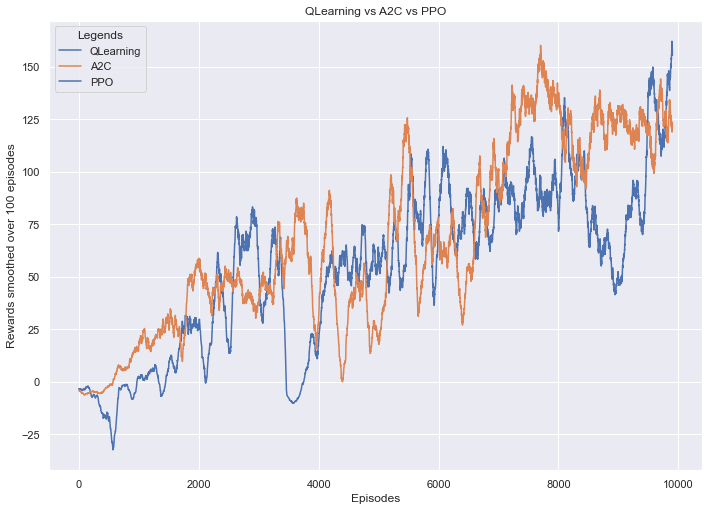

In [43]:
ax = sns.lineplot(data=[ppo_smoothed_rewards, ppo2_smoothed_rewards])
ax.lines[1].set_linestyle('-')
ax.lines[2].set_linestyle('-')
ax.lines[3].set_linestyle('-')
ax.set_xlabel('Episodes')
ax.set_ylabel('Rewards smoothed over 100 episodes')
plt.title('QLearning vs A2C vs PPO')
plt.legend(labels=["QLearning", "A2C", 'PPO'], title = "Legends")
plt.show()